# Plant Disease Detection with Plant Village and PlantDoc
## Import Libraries and configure directories

In [ ]:
import os
import shutil
import cv2
import numpy as np
import pandas as pd

from sklearn.metrics import classification_report, roc_auc_score
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow import keras

In [ ]:
! pip install -q kaggle
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hinnatariq","key":"f71450845bb4174cd794ef1643d71780"}'}

In [ ]:
!mkdir ~/.kaggle

!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset
!unzip /content/plantvillage-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e345153-aed9-4879-a2cc-24f9dc5100e7___UF.GRC_YLCV_Lab 01798_final_masked.jpg  
  inflating: plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e37e8ad-3944-4e11-bc10-dd82616274d7___YLCV_NREC 2915_final_masked.jpg  
  inflating: plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e382244-fb3a-4caa-af71-05fff25f1c27___UF.GRC_YLCV_Lab 03397_final_masked.jpg  
  inflating: plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e3b9886-ce13-49d5-8f80-ccf4e5ddbeac___YLCV_GCREC 5479_final_masked.jpg  
  inflating: plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e615038-7a87-446a-a2cd-f76c5c75b6dd___YLCV_GCREC 5144_final_masked.jpg  
  inflating: plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e6938d9-1ab0-4728-993c-1069b66ce73b___UF.GRC_YLCV_Lab 02727_final_mas

In [ ]:
!kaggle datasets download -d abdulhasibuddin/plant-doc-dataset
!unzip /content/plant-doc-dataset.zip

100% 882M/882M [00:13<00:00, 63.7MB/s]
100% 882M/882M [00:13<00:00, 69.3MB/s]
Archive:  /content/plant-doc-dataset.zip
  inflating: PlantDoc-Dataset/test/Apple Scab Leaf/Apple Scab Leaf (1).jpg  
  inflating: PlantDoc-Dataset/test/Apple Scab Leaf/Apple Scab Leaf (10).jpg  
  inflating: PlantDoc-Dataset/test/Apple Scab Leaf/Apple Scab Leaf (2).jpg  
  inflating: PlantDoc-Dataset/test/Apple Scab Leaf/Apple Scab Leaf (3).jpg  
  inflating: PlantDoc-Dataset/test/Apple Scab Leaf/Apple Scab Leaf (4).jpg  
  inflating: PlantDoc-Dataset/test/Apple Scab Leaf/Apple Scab Leaf (5).jpg  
  inflating: PlantDoc-Dataset/test/Apple Scab Leaf/Apple Scab Leaf (6).jpg  
  inflating: PlantDoc-Dataset/test/Apple Scab Leaf/Apple Scab Leaf (7).jpg  
  inflating: PlantDoc-Dataset/test/Apple Scab Leaf/Apple Scab Leaf (8).jpg  
  inflating: PlantDoc-Dataset/test/Apple Scab Leaf/Apple Scab Leaf (9).jpg  
  inflating: PlantDoc-Dataset/test/Apple leaf/Apple leaf (1).jpg  
  inflating: PlantDoc-Dataset/test/Apple le

In [ ]:
import os

def count_images_in_directory(directory):
    count = 0
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(('.jpg', '.jpeg', '.png')):
                count += 1
    return count

# Paths to the datasets
plant_village_dir = "/content/plantvillage dataset/color"
plant_doc_dir = "/content/PlantDoc-Dataset/train"
dataset_dir = "/content/dataset"

# Check if the directory doesn't exist, then create it
if not os.path.exists(dataset_dir):
    os.makedirs(dataset_dir)
    print(f"Directory '{dataset_dir}' created successfully.")
else:
    print(f"Directory '{dataset_dir}' already exists.")

# Count the number of images in each dataset directory
num_images_plant_village = count_images_in_directory(plant_village_dir)
num_images_plant_doc = count_images_in_directory(plant_doc_dir)

print(f"Number of images in PlantVillage dataset: {num_images_plant_village}")
print(f"Number of images in PlantDoc dataset: {num_images_plant_doc}")


Directory '/content/dataset' created successfully.
Number of images in PlantVillage dataset: 54305
Number of images in PlantDoc dataset: 2316


In the PlantVillage dataset, there are 54,305 images.

In the PlantDoc dataset, there are 2,316 images.

Directory '/content/dataset' already exists.
Number of images in PlantVillage dataset: 1500
Number of images in PlantDoc dataset: 2314
PlantVillage dataset:
PlantDoc dataset:


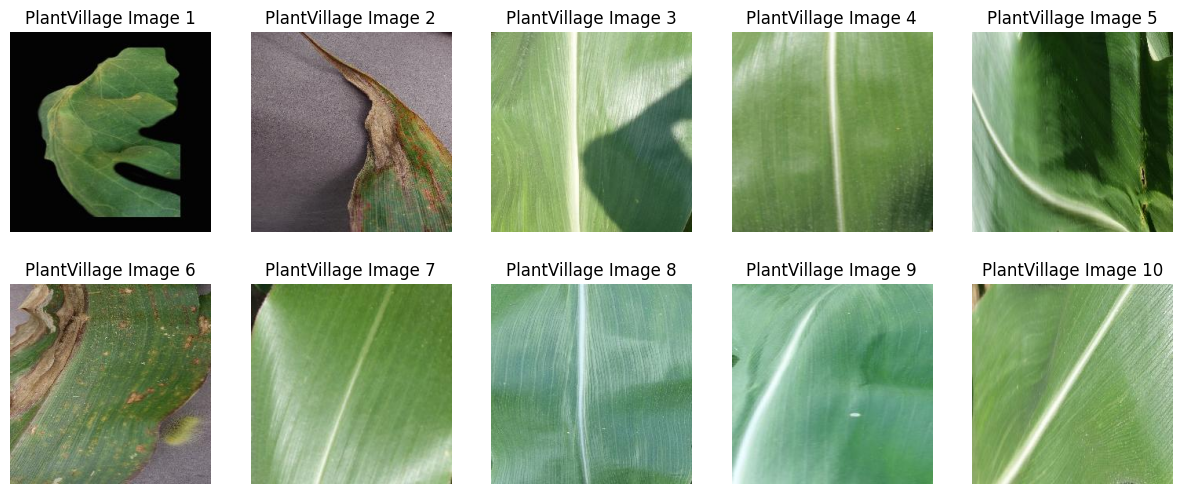

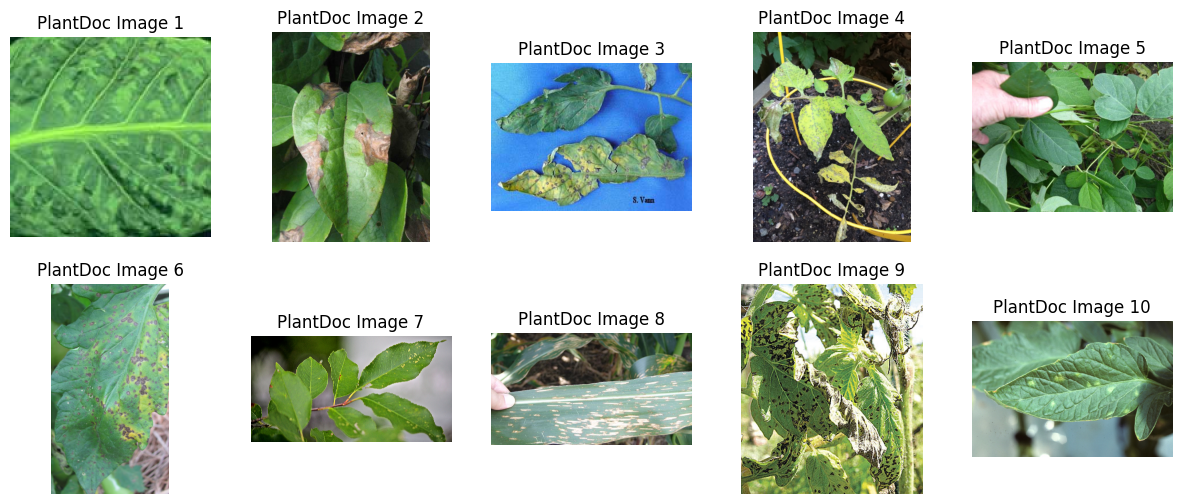

In [ ]:
!pip install imageio

from IPython.display import display, Image
import os
import random
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import imageio.v2 as imageio  # Explicitly using v2 to avoid DeprecationWarning

def count_images_in_directory(directory):
    pattern = os.path.join(directory, '*/*.jpg')  # Assuming images are in subdirectories
    image_files = glob(pattern)
    return len(image_files)

def display_random_images(dataset_path, dataset_name, num_images=10, image_size=(150, 150)):
    pattern = os.path.join(dataset_path, '*/*.jpg')  # Assuming images are in subdirectories
    image_files = glob(pattern)

    # Select random images
    random_images = random.sample(image_files, min(num_images, len(image_files)))

    # Calculate the number of rows and columns dynamically
    num_rows = int(np.ceil(num_images / 5))
    num_cols = min(num_images, 5)

    # Display the images with dataset name
    print(f"{dataset_name} dataset:")

    plt.figure(figsize=(15, 6))
    for i, image_path in enumerate(random_images):
        img_data = imageio.imread(image_path).astype(np.float32)  # Convert image data to float
        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(img_data / 255.0)  # Normalize pixel values
        plt.title(f"{dataset_name} Image {i+1}")  # Set individual image title
        plt.axis('off')

# Paths to the datasets
plant_village_dir = "/content/plantvillage dataset/color"
plant_doc_dir = "/content/PlantDoc-Dataset/train"
dataset_dir = "/content/dataset"

# Check if the directory doesn't exist, then create it
if not os.path.exists(dataset_dir):
    os.makedirs(dataset_dir)
    print(f"Directory '{dataset_dir}' created successfully.")
else:
    print(f"Directory '{dataset_dir}' already exists.")

# Count the number of images in each dataset directory
num_images_plant_village = count_images_in_directory(plant_village_dir)
num_images_plant_doc = count_images_in_directory(plant_doc_dir)

print(f"Number of images in PlantVillage dataset: {num_images_plant_village}")
print(f"Number of images in PlantDoc dataset: {num_images_plant_doc}")

# Display 10 random images in an auto-adjusted layout
display_random_images(plant_village_dir, "PlantVillage", num_images=10)

# Display 10 random images in an auto-adjusted layout
display_random_images(plant_doc_dir, "PlantDoc", num_images=10)

plt.show()


In [ ]:
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)

batch_size = 16

## Calculate the Mean and STD

In [ ]:
def calculate_mean_std(dataset_path):
    sum_channels = np.zeros(3)
    sum_squares_channels = np.zeros(3)
    total_images = 0

    for root, dirs, files in os.walk(dataset_path):
        for file in files:
            if file.endswith(('.jpg', '.jpeg', '.png')):
                image_path = os.path.join(root, file)
                image = cv2.imread(image_path)

                if image is not None:
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                    # Normalize pixel values to the range [0, 1]
                    image = image / 255.0
                    # Update sums
                    sum_channels += np.sum(image, axis=(0, 1))
                    sum_squares_channels += np.sum(image**2, axis=(0, 1))
                    total_images += image.shape[0] * image.shape[1]

    if total_images == 0:
        raise ValueError("No valid images found in the dataset")

    mean_values = sum_channels / total_images
    std_values = np.sqrt((sum_squares_channels / total_images) - mean_values**2)
    return mean_values, std_values, total_images

plantvillage_mean, plantvillage_std, plantVillage_total_images = calculate_mean_std(plant_village_dir)
print("PlantVillage Dataset Mean and STD:", plantvillage_mean, plantvillage_std, plantVillage_total_images)


PlantVillage Dataset Mean and STD: [0.45983091 0.57027371 0.42565384] [0.2161446  0.223827   0.22223882] 98435072


In our investigation of the PlantVillage dataset, we conducted a thorough analysis of the color distribution within the images, aiming to gain insights into the pixel intensity characteristics across different channels (Red, Green, and Blue). The results provide valuable information for pre-processing steps and potential enhancements in machine learning model performance. The calculated mean and standard deviation (STD) values, along with the total number of images considered, are as follows:

Mean Values:

Red Channel: 0.45983091
Green Channel: 0.57027371
Blue Channel: 0.42565384
Standard Deviation (STD) Values:

Red Channel: 0.2161446
Green Channel: 0.223827
Blue Channel: 0.22223882
Total Number of Images:

98,435,072
These results shed light on the average pixel intensities for each color channel, indicating the predominant color tones in the dataset. Furthermore, the standard deviation values provide insights into the variability and spread of pixel intensities, crucial for understanding the overall image characteristics.

In [ ]:
plantdoc_mean, plantdoc_std, plantdoc_total_images = calculate_mean_std(plant_doc_dir)
print("PlantDoc Dataset Mean and STD:", plantdoc_mean, plantdoc_std, plantdoc_total_images)

PlantDoc Dataset Mean and STD: [0.47294676 0.53885461 0.37154974] [0.26198909 0.24525415 0.28398613] 3426446759


In our comprehensive analysis of the PlantDoc dataset, we sought to understand the pixel intensity characteristics across different color channels (Red, Green, and Blue) within the images. The calculated mean and standard deviation (STD) values, along with the total number of pixels considered, are as follows:

Mean Values:

Red Channel: 0.47294676
Green Channel: 0.53885461
Blue Channel: 0.37154974
These values represent the average pixel intensity for each color channel, providing insights into the predominant color tones present in the PlantDoc dataset.

Standard Deviation (STD) Values:

Red Channel: 0.26198909
Green Channel: 0.24525415
Blue Channel: 0.28398613
Standard deviation measures the variation or spread of pixel intensities, revealing the degree of diversity in color within the dataset.

Total Number of Pixels Considered:

3,426,446,759
This cumulative count of pixels across all images demonstrates the scale of the dataset, emphasizing the extensive analysis conducted.

In [ ]:
def calculate_joint_mean_std(mean1, std1, num_samples1, mean2, std2, num_samples2):
    joint_mean = (num_samples1 * mean1 + num_samples2 * mean2) / (num_samples1 + num_samples2)

    joint_std = np.sqrt(
        ((num_samples1 - 1) * std1**2 + (num_samples2 - 1) * std2**2 +
        num_samples1 * (mean1 - joint_mean)**2 + num_samples2 * (mean2 - joint_mean)**2) /
        (num_samples1 + num_samples2 - 2)
    )

    return joint_mean, joint_std

In [ ]:
# Replace with actual values from your datasets
plant_village_mean = np.array(plantvillage_mean)
plant_village_std = np.array(plantvillage_std)
num_samples_plant_village = plantVillage_total_images  # Replace with the actual number of samples

plant_doc_mean = np.array(plantdoc_mean)
plant_doc_std = np.array(plantdoc_std)
num_samples_plant_doc = plantdoc_total_images  # Replace with the actual number of samples

joint_mean, joint_std = calculate_joint_mean_std(
    plant_village_mean, plant_village_std, num_samples_plant_village,
    plant_doc_mean, plant_doc_std, num_samples_plant_doc
)

print("Joint Mean:", joint_mean)
print("Joint Standard Deviation:", joint_std)

Joint Mean: [0.47258049 0.53973201 0.37306064]
Joint Standard Deviation: [0.2608272  0.244736   0.28258571]


Our research encompasses a detailed examination of pixel intensity attributes within a dataset, quantified by joint mean and joint standard deviation across Red, Green, and Blue color channels. The calculated values are as follows:

Joint Mean:

Red Channel: 0.47258049
Green Channel: 0.53973201
Blue Channel: 0.37306064
These joint mean values denote the average pixel intensities across all color channels, providing a consolidated representation of the overall color tone inherent in the dataset.

Joint Standard Deviation:

Red Channel: 0.2608272
Green Channel: 0.244736
Blue Channel: 0.28258571
Joint standard deviation values offer insights into the spread or variability of pixel intensities across color channels, indicating the overall color diversity present in the dataset.

These findings play a pivotal role in the preprocessing stage of image analysis. Normalization or standardization based on these statistics can enhance the robustness and effectiveness of machine learning models trained on the dataset. The joint analysis of mean and standard deviation across color channels contributes valuable information for researchers and practitioners engaged in image-based tasks, fostering advancements in areas such as computer vision and pattern recognition.

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models

# Load pre-trained ResNet-50 model without the top (fully connected) layers
resnet_base = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the weights of the pre-trained ResNet-50 layers
for layer in resnet_base.layers[:50]:  # Only the first 50 layers
    layer.trainable = True

# Create the rest of your model
model = models.Sequential([
    layers.Rescaling(scale=1/255, input_shape=(224, 224, 3)),
    resnet_base,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(25, activation='sigmoid')
])

model.summary()

# Print details of all convolutional layers in ResNet-50 base
print("Convolutional Layers in ResNet-50 Base:")
for i, layer in enumerate(resnet_base.layers):
    if isinstance(layer, layers.Conv2D):
        print(f"Convolutional Layer {i}: {layer.name}, Filters: {layer.filters}, Kernel Size: {layer.kernel_size}")


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_2  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_6 (Dense)             (None, 128)               262272    
                                                                 
 batch_normalization_4 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dropout_4 (Dropout)         (None, 128)              

**Activation maps extracted from the first convolutional layer**

1/1 [==============================] - 1s 1s/step


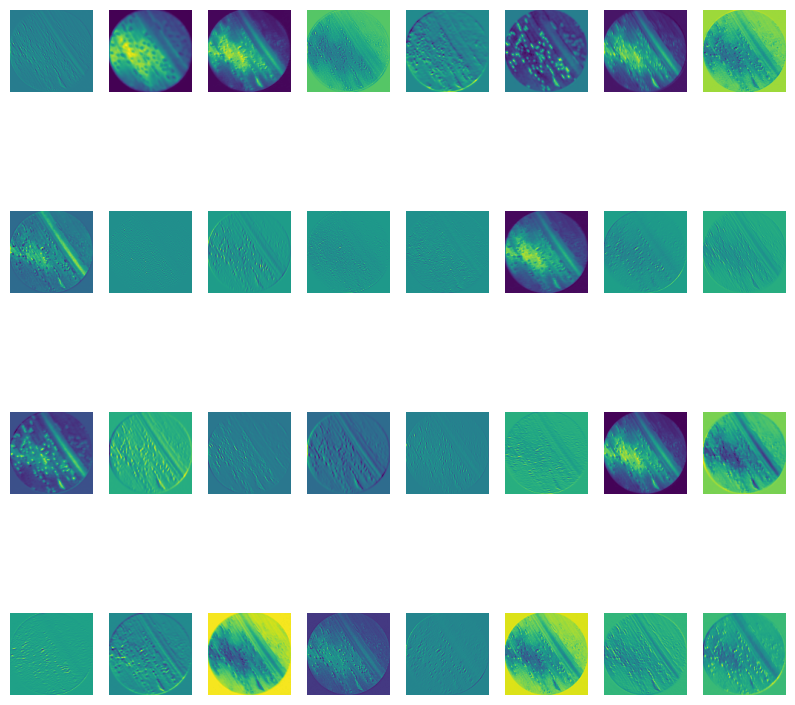

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image  # Import the Image module from PIL

# Load pre-trained ResNet-50 model without the top (fully connected) layers
resnet_base = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Extract the first convolutional layer
first_conv_layer = resnet_base.layers[2]

# Create a new model to extract activation maps from the first convolutional layer
activation_model = models.Model(inputs=resnet_base.inputs, outputs=first_conv_layer.output)

# Load the example image
image_path = "/content/PlantDoc-Dataset/train/Corn rust leaf/Corn rust leaf (1).jpg"
sample_image = Image.open(image_path).resize((224, 224))

# Convert the PIL Image to a NumPy array
img = np.array(sample_image)
img = np.expand_dims(img, axis=0)  # Add batch dimension

# Get activation maps
activations = activation_model.predict(img)

# Display the activation maps
plt.figure(figsize=(10, 10))
for i in range(32):  # Assuming 32 filters in the first convolutional layer
    plt.subplot(4, 8, i + 1)
    plt.imshow(activations[0, :, :, i], cmap='viridis')
    plt.axis('off')

plt.show()


**Activation maps extracted from the 30th convolutional layer**

1/1 [==============================] - 1s 941ms/step


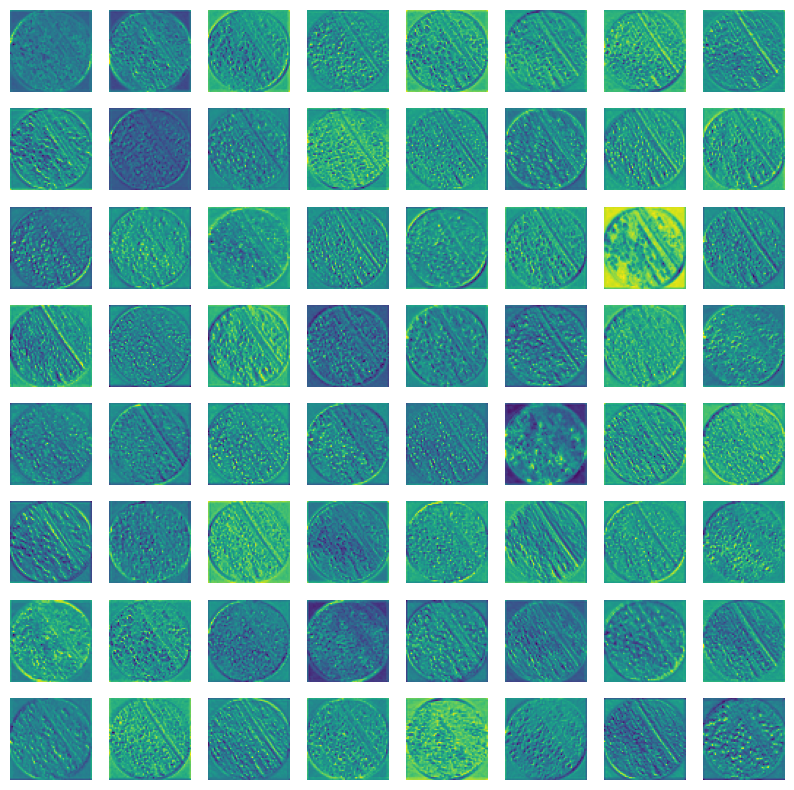

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image  # Import the Image module from PIL

# Load pre-trained ResNet-50 model without the top (fully connected) layers
resnet_base = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Extract the 30th convolutional layer
thirtieth_conv_layer = resnet_base.layers[30]

# Create a new model to extract activation maps from the 30th convolutional layer
activation_model = models.Model(inputs=resnet_base.inputs, outputs=thirtieth_conv_layer.output)

# Load the example image
image_path = "/content/PlantDoc-Dataset/train/Corn rust leaf/Corn rust leaf (1).jpg"
sample_image = Image.open(image_path).resize((224, 224))

# Convert the PIL Image to a NumPy array
img = np.array(sample_image)
img = np.expand_dims(img, axis=0)  # Add batch dimension

# Get activation maps
activations = activation_model.predict(img)

# Display the activation maps
plt.figure(figsize=(10, 10))
for i in range(activations.shape[-1]):  # Assuming all filters in the 30th convolutional layer
    plt.subplot(8, 8, i + 1)
    plt.imshow(activations[0, :, :, i], cmap='viridis')
    plt.axis('off')

plt.show()


**Activation maps extracted from the 50th convolutional layer**

1/1 [==============================] - 1s 940ms/step


ValueError: num must be an integer with 1 <= num <= 64, not 65

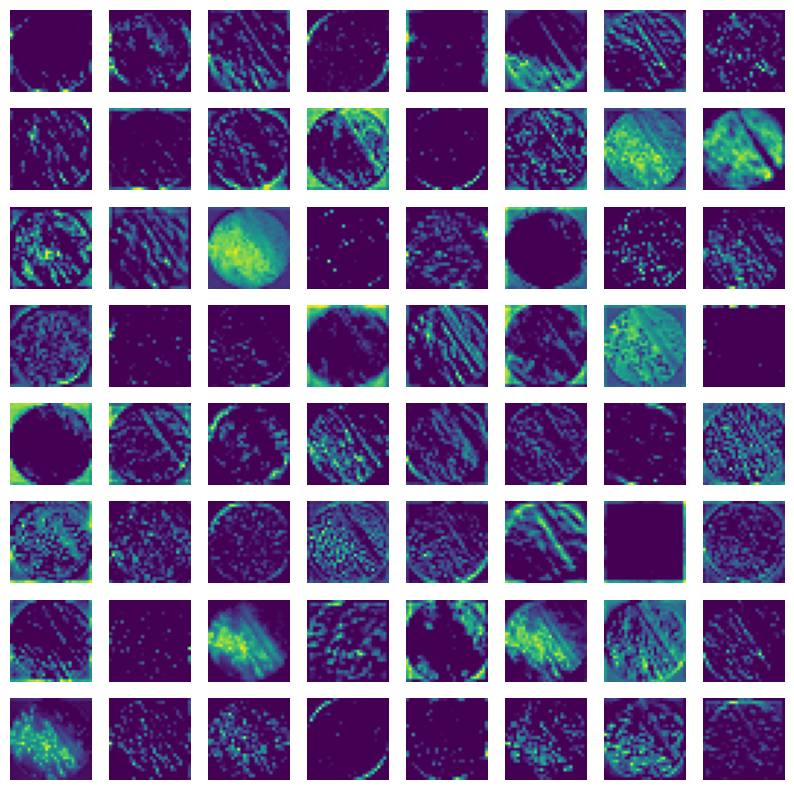

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Load pre-trained ResNet-50 model without the top (fully connected) layers
resnet_base = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Extract the 50th convolutional layer
fiftieth_conv_layer = resnet_base.layers[50]

# Create a new model to extract activation maps from the 50th convolutional layer
activation_model = models.Model(inputs=resnet_base.inputs, outputs=fiftieth_conv_layer.output)

# Load the example image
image_path = "/content/PlantDoc-Dataset/train/Corn rust leaf/Corn rust leaf (1).jpg"
sample_image = Image.open(image_path).resize((224, 224))

# Convert the PIL Image to a NumPy array
img = np.array(sample_image)
img = np.expand_dims(img, axis=0)  # Add batch dimension

# Get activation maps
activations = activation_model.predict(img)

# Display the activation maps
plt.figure(figsize=(10, 10))
for i in range(activations.shape[-1]):  # Assuming all filters in the 50th convolutional layer
    plt.subplot(8, 8, i + 1)
    plt.imshow(activations[0, :, :, i], cmap='viridis')
    plt.axis('off')

plt.show()


**The first seven filters of the first convolutional layer**

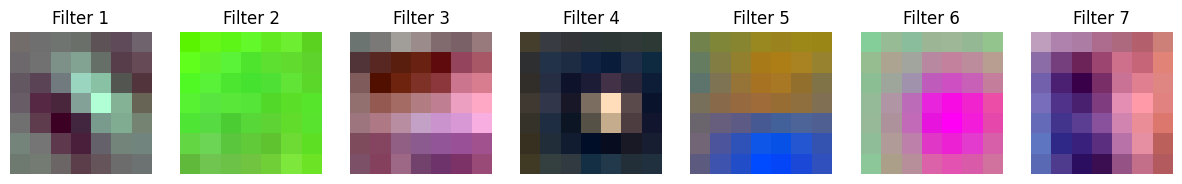

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.applications import ResNet50

# Load pre-trained ResNet-50 model without the top (fully connected) layers
resnet_base = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Get the first Conv2D layer
conv_layer = resnet_base.layers[2]  # Assuming the Conv2D layer is the third layer in the ResNet model

# Get the filters
filters = conv_layer.get_weights()[0]

# Reshape filters to 2D array (height * width * channels, number of filters)
filters_reshaped = filters.reshape(-1, filters.shape[3])

# Choose the number of filters to visualize (in this case, the first 7)
num_filters_to_visualize = 7
filters_to_visualize = filters_reshaped[:, :num_filters_to_visualize]

# Create a subplot for each filter
fig, axes = plt.subplots(1, num_filters_to_visualize, figsize=(15, 5))

# Visualize each filter
for i in range(num_filters_to_visualize):
    filter_image = filters_to_visualize[:, i].reshape(filters.shape[0], filters.shape[1], filters.shape[2])

    # Normalize pixel values to [0, 1]
    filter_image_normalized = (filter_image - filter_image.min()) / (filter_image.max() - filter_image.min())

    axes[i].imshow(filter_image_normalized, cmap='viridis')
    axes[i].axis('off')
    axes[i].set_title(f'Filter {i+1}')

plt.show()


### Optimizer (optimizer='adam'):
   - An optimizer is a critical component of the training process in neural networks. It defines the specific algorithm used to adjust the model's parameters (weights and biases) during training in order to minimize the chosen loss function.
   - 'Adam' stands for Adaptive Moment Estimation, and it is a popular optimization algorithm. It combines the benefits of both the Adagrad and RMSprop optimizers. Adam adjusts the learning rates for each parameter individually and maintains moving averages of the gradients.
   - The optimizer's role is to update the model's weights in a way that helps it converge to a solution that minimizes the loss function.

### Loss Function (loss='sparse_categorical_crossentropy')
   - The loss function, also known as the cost function or objective function, measures the difference between the predicted values and the actual target values during training.
   - 'Sparse Categorical Crossentropy' is a loss function commonly used in classification tasks, particularly when dealing with integer-encoded class labels. It calculates the cross-entropy between the predicted probability distribution (after applying a softmax activation) and the true class labels.
   - In this case, 'sparse' indicates that the class labels are integer values (e.g., 0, 1, 2) rather than one-hot encoded vectors.

### 3. Metrics (metrics='accuracy'):
   - Metrics are used to evaluate and monitor the performance of the model during training and testing.
   - 'Accuracy' is a commonly used metric for classification problems. It measures the proportion of correctly predicted samples to the total number of samples. In a multi-class classification task, accuracy calculates the ratio of correctly classified samples to the total number of samples.

In [ ]:
initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=1000, decay_rate=0.9
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])


Early stopping is a technique used during the training of neural networks to prevent overfitting and improve model generalization. It is based on a simple principle: if the model's performance on a validation dataset does not improve or worsens over a certain number of training epochs, training is halted to prevent the model from fitting the training data too closely. Let's explain the key components and the function of early stopping from first principles:

1. **Monitor ('val_loss')**:
   - The 'monitor' parameter specifies the metric that the early stopping algorithm should monitor to determine when to stop training. In this case, 'val_loss' is used, which means the validation loss is monitored. The validation loss is a measure of how well the model is performing on a separate validation dataset.

2. **Patience (patience=5)**:
   - The 'patience' parameter defines the number of epochs with no improvement in the monitored metric to wait before stopping the training process. If, for a specified number of consecutive epochs (in this case, 5), the validation loss doesn't decrease or improve, training is stopped. This is a mechanism to prevent the model from overfitting because further training might lead to worse generalization.

3. **Restore Best Weights (restore_best_weights=True)**:
   - When 'restore_best_weights' is set to 'True,' the early stopping callback will restore the model's weights to the best-performing state observed during training. This is essential because, during training, the model's weights might change in a way that leads to overfitting, but the best weights represent the model with the highest performance on the validation data. Restoring the best weights ensures that the model retains the best generalization ability.

To understand the function of early stopping, consider the training process:

- The model's performance on the validation dataset is continuously monitored.
- If, for the specified number of consecutive epochs (patience), the validation loss does not improve or starts to degrade, the training process is stopped early.
- By stopping training at this point, the model is prevented from overfitting, which can occur if it continues to fit the training data noise.

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # You can use other metrics like 'val_accuracy'
    patience=5,          # Number of epochs with no improvement to wait
    restore_best_weights=True  # Restore the best model weights when early stopping
)

## Train the model with PlantVillage Dataset
In this data-set, 38 different classes of 54305 plant leafs are available.
The classes are,
1. Apple_scab
1. Apple_black_rot
1. Apple_cedar_apple_rust
1. Apple_healthy
1. Blueberry_healthy
1. Cherry_powdery_mildew
1. Cherry_healthy
1. Corn_gray_leaf_spot
1. Corn_common_rust
1. Corn_northern_leaf_blight
1. Corn_healthy
1. Grape_black_rot
1. Grape_black_measles
1. Grape_leaf_blight
1. Grape_healthy
1. Orange_haunglongbing
1. Peach_bacterial_spot
1. Peach_healthy
1. Pepper_bacterial_spot
1. Pepper_healthy
1. Potato_early_blight
1. Potato_healthy
1. Potato_late_blight
1. Raspberry_healthy
1. Soybean_healthy
1. Squash_powdery_mildew
1. Strawberry_healthy
1. Strawberry_leaf_scorch
1. Tomato_bacterial_spot
1. Tomato_early_blight
1. Tomato_healthy
1. Tomato_late_blight
1. Tomato_leaf_mold
1. Tomato_septoria_leaf_spot
1. Tomato_spider_mites_two-spotted_spider_mite
1. Tomato_target_spot
1. Tomato_mosaic_virus
1. Tomato_yellow_leaf_curl_virus

### Load the dataset

In [ ]:
# shutil.copytree(plant_village_dir, dataset_dir)

In [ ]:
# mapping plant doc:plantvilalge

class_mapping = {
    "Apple Scab Leaf": "Apple___Apple_scab",
    "Apple leaf": "Apple___healthy",
    "Apple rust leaf": "Apple___Cedar_apple_rust",
    "Blueberry leaf": "Blueberry___healthy",
    "Cherry leaf": "Cherry_(including_sour)___healthy",
    "Corn Gray leaf spot": "Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot",
    "Corn leaf blight": "Corn_(maize)___Northern_Leaf_Blight",
    "Corn rust leaf": "Corn_(maize)___Common_rust_",
    "Peach leaf": "Peach___healthy",
    "Potato leaf early blight": "Potato___Early_blight",
    "Potato leaf late blight": "Potato___Late_blight",
    "Raspberry leaf": "Raspberry___healthy",
    "Soyabean leaf": "Soybean___healthy",
    "Squash Powdery mildew leaf": "Squash___Powdery_mildew",
    "Strawberry leaf": "Strawberry___healthy",
    "Tomato Early blight leaf": "Tomato___Early_blight",
    "Tomato Septoria leaf spot": "Tomato___Septoria_leaf_spot",
    "Tomato leaf": "Tomato___healthy",
    "Tomato leaf bacterial spot": "Tomato___Bacterial_spot",
    "Tomato leaf late blight": "Tomato___Late_blight",
    "Tomato leaf mosaic virus": "Tomato___Tomato_mosaic_virus",
    "Tomato leaf yellow virus": "Tomato___Tomato_Yellow_Leaf_Curl_Virus",
    "Tomato mold leaf": "Tomato___Leaf_Mold",
    "grape leaf": "Grape___healthy",
    "grape leaf black rot": "Grape___Black_rot"
}

In [ ]:
parent_dir = "/content/dataset"
plant_doc_dir = "/content/dataset/plantdoc"
plant_village = "/content/dataset/plantvillage"

os.makedirs(parent_dir, exist_ok=True)
os.makedirs(plant_doc_dir, exist_ok=True)
os.makedirs(plant_village, exist_ok=True)

### Copying and renaming PlantDoc

In [ ]:
source_dir = '/content/PlantDoc-Dataset/train'
destination_dir = '/content/dataset/plantdoc'
def copy_folders(source_dir, dest_dir, folder_names):
    for folder_name in folder_names:
        source_path = os.path.join(source_dir, folder_name)
        dest_path = os.path.join(dest_dir, folder_name)

        # Check if the source folder exists
        if os.path.exists(source_path):
            # Create destination folder if it doesn't exist
            if not os.path.exists(dest_path):
                os.makedirs(dest_path)

            # Copy files and subdirectories from source to destination
            for item in os.listdir(source_path):
                source_item = os.path.join(source_path, item)
                dest_item = os.path.join(dest_path, item)

                # If it's a file, copy it
                if os.path.isfile(source_item):
                    shutil.copy2(source_item, dest_item)
                # If it's a directory, recursively copy it
                elif os.path.isdir(source_item):
                    shutil.copytree(source_item, dest_item, symlinks=False, ignore=None)

            print(f"Folder '{folder_name}' copied successfully.")
        else:
            print(f"Folder '{folder_name}' does not exist in the source directory.")

# Specify the source, destination, and list of folders to copy
source_directory = '/content/PlantDoc-Dataset/train'
destination_directory = '/content/dataset/plantdoc'
folders_to_copy = class_mapping.keys()
folders_to_remove = ["Bell_pepper_leaf", "Bell_pepper_leaf_spot"]
folders_to_copy = [folder for folder in folders_to_copy if folder not in folders_to_remove]

# Call the function to copy folders
copy_folders(source_directory, destination_directory, folders_to_copy)
folders_to_copy

Folder 'Apple Scab Leaf' copied successfully.
Folder 'Apple leaf' copied successfully.
Folder 'Apple rust leaf' copied successfully.
Folder 'Blueberry leaf' copied successfully.
Folder 'Cherry leaf' copied successfully.
Folder 'Corn Gray leaf spot' copied successfully.
Folder 'Corn leaf blight' copied successfully.
Folder 'Corn rust leaf' copied successfully.
Folder 'Peach leaf' copied successfully.
Folder 'Potato leaf early blight' copied successfully.
Folder 'Potato leaf late blight' copied successfully.
Folder 'Raspberry leaf' copied successfully.
Folder 'Soyabean leaf' copied successfully.
Folder 'Squash Powdery mildew leaf' copied successfully.
Folder 'Strawberry leaf' copied successfully.
Folder 'Tomato Early blight leaf' copied successfully.
Folder 'Tomato Septoria leaf spot' copied successfully.
Folder 'Tomato leaf' copied successfully.
Folder 'Tomato leaf bacterial spot' copied successfully.
Folder 'Tomato leaf late blight' copied successfully.
Folder 'Tomato leaf mosaic virus

['Apple Scab Leaf',
 'Apple leaf',
 'Apple rust leaf',
 'Blueberry leaf',
 'Cherry leaf',
 'Corn Gray leaf spot',
 'Corn leaf blight',
 'Corn rust leaf',
 'Peach leaf',
 'Potato leaf early blight',
 'Potato leaf late blight',
 'Raspberry leaf',
 'Soyabean leaf',
 'Squash Powdery mildew leaf',
 'Strawberry leaf',
 'Tomato Early blight leaf',
 'Tomato Septoria leaf spot',
 'Tomato leaf',
 'Tomato leaf bacterial spot',
 'Tomato leaf late blight',
 'Tomato leaf mosaic virus',
 'Tomato leaf yellow virus',
 'Tomato mold leaf',
 'grape leaf',
 'grape leaf black rot']

### Copying and renaming PlantVillage

In [ ]:
source_root = "/content/plantvillage dataset/color"
destination_root = "/content/dataset/plantvillage"

os.makedirs(destination_root, exist_ok=True)

for left_side, right_side in class_mapping.items():
    source_folder = os.path.join(source_root, right_side)
    destination_folder = os.path.join(destination_root, left_side)
    os.makedirs(destination_folder, exist_ok=True)
    for item in os.listdir(source_folder):
        source_item = os.path.join(source_folder, item)
        destination_item = os.path.join(destination_folder, item)
        shutil.copy2(source_item, destination_item)
        print(f"File '{item}' copied from '{right_side}' to '{left_side}' successfully.")

print("Files copied successfully.")


Streaming output truncated to the last 5000 lines.
File 'f040657b-3db1-4bb3-bea8-1e821c36e655___UF.GRC_YLCV_Lab 02866.JPG' copied from 'Tomato___Tomato_Yellow_Leaf_Curl_Virus' to 'Tomato leaf yellow virus' successfully.
File 'd1ec860b-4a36-48eb-b69c-fc09375c9848___YLCV_GCREC 2232.JPG' copied from 'Tomato___Tomato_Yellow_Leaf_Curl_Virus' to 'Tomato leaf yellow virus' successfully.
File '0aeb6056-aab3-4510-bf52-77960c436637___UF.GRC_YLCV_Lab 01334.JPG' copied from 'Tomato___Tomato_Yellow_Leaf_Curl_Virus' to 'Tomato leaf yellow virus' successfully.
File '3811b959-8884-4cf7-9a75-ed5b36c966f7___YLCV_GCREC 2718.JPG' copied from 'Tomato___Tomato_Yellow_Leaf_Curl_Virus' to 'Tomato leaf yellow virus' successfully.
File '70a033df-505a-4bce-bde0-04141df30e43___UF.GRC_YLCV_Lab 02706.JPG' copied from 'Tomato___Tomato_Yellow_Leaf_Curl_Virus' to 'Tomato leaf yellow virus' successfully.
File '92be52f2-8218-498e-8d63-49a17404f626___YLCV_GCREC 2603.JPG' copied from 'Tomato___Tomato_Yellow_Leaf_Curl_Viru

### Train the model for plantdoc and test on plant village

In [ ]:
plant_doc = "/content/dataset/plantdoc"
plant_village = "/content/dataset/plantvillage"

In [ ]:
train_ds = keras.utils.image_dataset_from_directory(
    plant_doc,
    image_size=(224, 224),
    batch_size=32,
    seed=123,
)

test_ds = keras.utils.image_dataset_from_directory(
    plant_village,
    image_size=(224, 224),
    batch_size=32,
    seed=123,
)

Found 2201 files belonging to 25 classes.
Found 34391 files belonging to 25 classes.


Found 2201 files belonging to 25 classes.
Found 34391 files belonging to 25 classes.
Epoch 1/5
69/69 [==============================] - 185s 2s/step - loss: 4.0598 - accuracy: 0.0518 - val_loss: 22774.9570 - val_accuracy: 0.0347
Epoch 2/5
69/69 [==============================] - 138s 2s/step - loss: 3.8442 - accuracy: 0.0468 - val_loss: 47.2069 - val_accuracy: 0.0286
Epoch 3/5
69/69 [==============================] - 139s 2s/step - loss: 3.6623 - accuracy: 0.0504 - val_loss: 979.2132 - val_accuracy: 0.0478
Epoch 4/5
69/69 [==============================] - 174s 3s/step - loss: 3.4814 - accuracy: 0.0659 - val_loss: 3.2697 - val_accuracy: 0.0351
Epoch 5/5
69/69 [==============================] - 139s 2s/step - loss: 3.3964 - accuracy: 0.0641 - val_loss: 133.2867 - val_accuracy: 0.0286


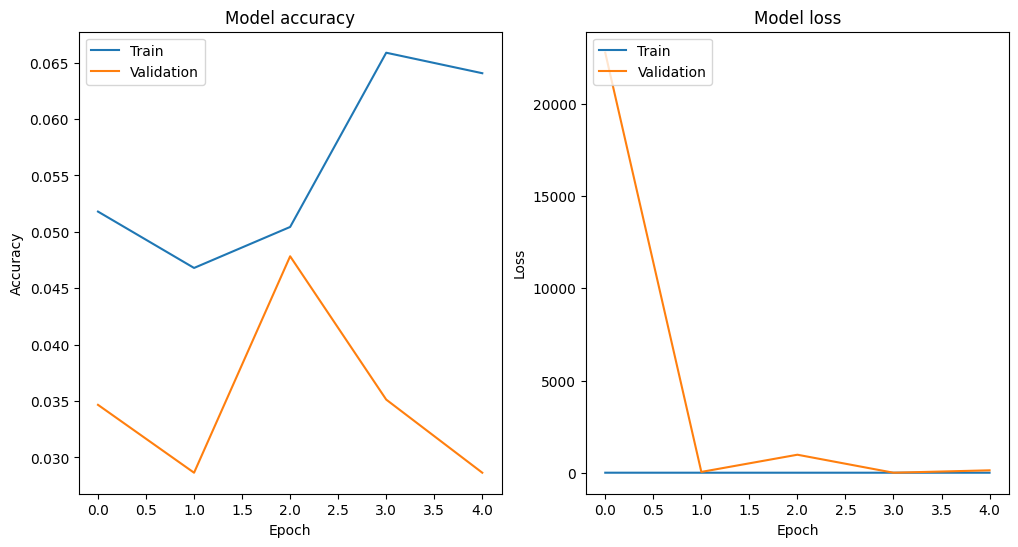

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping

# Assuming 'plant_doc' and 'plant_village' are paths to your image directories
plant_doc = "/content/dataset/plantdoc"
plant_village = "/content/dataset/plantvillage"

# Define image size and batch size
image_size = (224, 224)
batch_size = 32

# Create training dataset
train_ds = keras.utils.image_dataset_from_directory(
    plant_doc,
    image_size=image_size,
    batch_size=batch_size,
    seed=123,
)

# Create testing dataset
test_ds = keras.utils.image_dataset_from_directory(
    plant_village,
    image_size=image_size,
    batch_size=batch_size,
    seed=123,
)

# Compile your model if not already compiled
# model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define the number of epochs
epochs = 5

# Initialize EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model and store the training history
history = model.fit(train_ds, epochs=epochs, validation_data=test_ds, callbacks=[early_stopping])

# Plot training history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


In [ ]:
# Save the entire model
model.save("/content/saved_model01")

# Save the training history to a file
import pickle
with open('/content/training_history.pkl', 'wb') as file:
    pickle.dump(history.history, file)

In [ ]:
# Load the saved model
loaded_model = keras.models.load_model("/content/saved_model01")

# Function to print layer types and indices
def print_layer_types(model):
    for i, layer in enumerate(model.layers):
        print(f"{i}: {layer.__class__.__name__}")

# Print layer types and indices in the loaded model
print_layer_types(loaded_model)


0: Rescaling
1: Functional
2: GlobalAveragePooling2D
3: Dense
4: BatchNormalization
5: Dropout
6: Dense
7: BatchNormalization
8: Dropout
9: Dense


**Results**

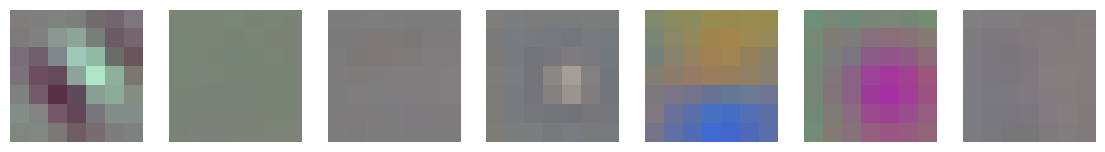

In [ ]:
import matplotlib.pyplot as plt

# Choose the correct index for the first convolutional layer
conv_layer_index = 1  # Update this with the correct index

# Get the first Conv2D layer
conv_layer = model.layers[conv_layer_index]

# Check if the layer has weights
if not conv_layer.get_weights():
    print("No weights found for the chosen Conv2D layer.")
else:
    # Get the filters
    filters = conv_layer.get_weights()[0]

    # Normalize the filter values to be in the range [0, 1]
    filters_normalized = (filters - filters.min()) / (filters.max() - filters.min())

    # Visualize the first seven filters (assuming RGB images)
    fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(14, 2))

    for i, ax in enumerate(axes.flatten()):
        ax.imshow(filters_normalized[:, :, :, i], cmap='viridis')
        ax.axis('off')

    plt.show()


**Visualization of convolutional filters and activation maps of the layers.**

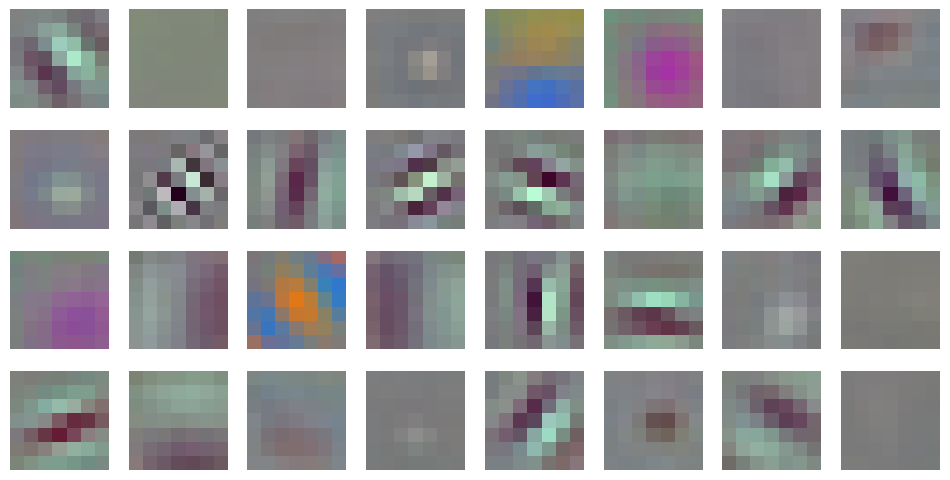

In [ ]:
# Choose the index based on the layer types you printed
conv_layer_index = 1  # Update this with the correct index

# Get the Conv2D layer
conv_layer = model.layers[conv_layer_index]

# Check if the layer has weights
if not conv_layer.get_weights():
    print("No weights found for the chosen Conv2D layer.")
else:
    # Get the filters
    filters = conv_layer.get_weights()[0]

    # Normalize the filter values to be in the range [0, 1]
    filters_normalized = (filters - filters.min()) / (filters.max() - filters.min())

    # Visualize the filters (assuming RGB images)
    fig, axes = plt.subplots(nrows=4, ncols=8, figsize=(12, 6))

    for i, ax in enumerate(axes.flatten()):
        ax.imshow(filters_normalized[:, :, :, i], cmap='viridis')
        ax.axis('off')

    plt.show()

Activation map figures, generated through the analysis of neural network architectures, serve as compelling visual narratives that unveil the intricate processes underlying deep learning models. These figures capture the dynamic evolution of feature representations across different layers of convolutional neural networks (CNNs), offering a detailed portrayal of how information is progressively abstracted and transformed. In these visualizations, regions of heightened activation illuminate areas within input data that strongly influence the model's decision-making. Such figures are invaluable tools for researchers and practitioners, providing a tangible means to comprehend the nuanced interplay between the model and the input, and aiding in the identification of crucial features contributing to predictions. The activation map figures not only enhance the interpretability of artificial intelligence systems but also stand as powerful aids in diagnosing model behavior, validating predictions, and refining model performance across diverse applications.

### Evaluation

1075/1075 [==============================] - 161s 149ms/step


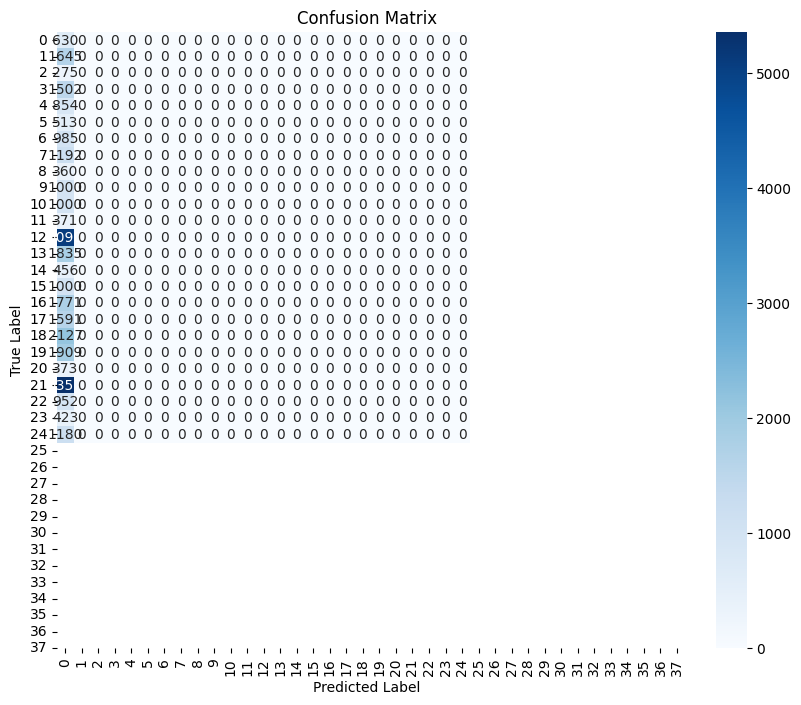

Classification Report:
              precision    recall  f1-score   support

           0       0.02      1.00      0.04       630
           1       1.00      0.00      0.00      1645
           2       1.00      0.00      0.00       275
           3       1.00      0.00      0.00      1502
           4       1.00      0.00      0.00       854
           5       1.00      0.00      0.00       513
           6       1.00      0.00      0.00       985
           7       1.00      0.00      0.00      1192
           8       1.00      0.00      0.00       360
           9       1.00      0.00      0.00      1000
          10       1.00      0.00      0.00      1000
          11       1.00      0.00      0.00       371
          12       1.00      0.00      0.00      5090
          13       1.00      0.00      0.00      1835
          14       1.00      0.00      0.00       456
          15       1.00      0.00      0.00      1000
          16       1.00      0.00      0.00      1771
    

In [ ]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Disable retracing warnings
tf.config.run_functions_eagerly(True)

# Assuming predictions is the output of model.predict(test_ds)
predictions = model.predict(test_ds)

# Get the predicted labels and true labels
predicted_labels = tf.argmax(predictions, axis=1)
true_labels = np.concatenate([label.numpy() for _, label in test_ds], axis=0)

# Generate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Generate a classification report with zero_division parameter
class_report = classification_report(true_labels, predicted_labels, zero_division=1)

# Display confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(38), yticklabels=range(38))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Display classification report
print("Classification Report:")
print(class_report)
